# Tensorflow 2.0 Neural Network Tutorial

### Sources:
 1. General: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
 2. Custom loss: https://towardsdatascience.com/custom-loss-function-in-tensorflow-2-0-d8fa35405e4e

### Extras:
 - https://www.tensorflow.org/tutorials/quickstart/beginner
 - https://www.tensorflow.org/guide/keras/overview
 - https://www.tensorflow.org/tutorials/keras/classification
 - https://lambdalabs.com/blog/tensorflow-2-0-tutorial-01-image-classification-basics/
 - https://towardsdatascience.com/advanced-keras-constructing-complex-custom-losses-and-metrics-c07ca130a618


## Preliminaries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as kb

## 5 Steps

1. Define model
2. Compile model
3. Fit model
4. Evaluate model
5. Make predictions

## Multi-layer Perceptron for Multiclass Classification

In [3]:
# Load dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = pd.read_csv(path, header=None)

In [4]:
# Data preprocessing
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype("float32")

# Map string labels (iris-setosa,...) to integer labels (0, 1,...)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [52]:
n_features = X_train.shape[1]

In [53]:
# 1. Define model
model = Sequential()

# Note: kernel_initializer is the distribution from which the weights will be generated
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [54]:
# 2. Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# 3. Fit model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, validation_split=0.3)

In [56]:
# 4. Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [57]:
print(f"Test Accuracy: {acc}")

Test Accuracy: 0.9200000166893005


In [58]:
# 5. Make a prediction
row = [5.1, 3.5, 1.4, 0.2]
y_hat = model.predict([row])

In [59]:
print(f"Predicted: {y_hat} (class={np.argmax(y_hat)})")

Predicted: [[0.6080413  0.21246018 0.1794986 ]] (class=0)


## Other features

In [60]:
# 1. Getting a model description
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


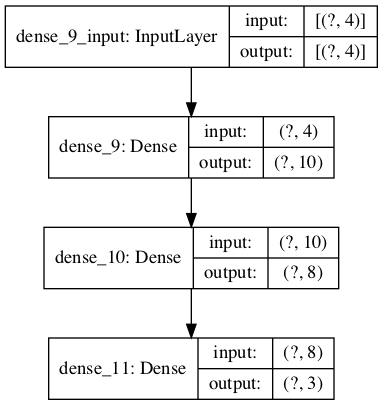

In [61]:
# 2. Plot the model
plot_model(model, 'model.png', show_shapes=True)

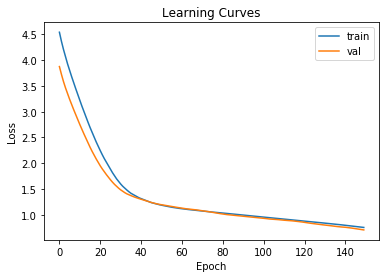

In [62]:
# 3. Plot learning curve
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "val")
plt.legend()
plt.show()

In [64]:
# All the attributes we could access through time
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [66]:
# 4. Save model
model.save('model.h5')

In [67]:
# 5. Load model
model = load_model('model.h5')
row = [5.1, 3.5, 1.4, 0.2]
y_hat = model.predict([row])
print(f"Predicted: {y_hat} (class={np.argmax(y_hat)})")

Predicted: [[0.6080413  0.21246018 0.1794986 ]] (class=0)


In [68]:
# 6. Add dropout (within Dense layers)
# from tensorflow.keras.layers import Dropout
# model.add(Dropout(0.2))

In [69]:
# 7. Batch Normalization (also within dense layers)
# from tensorflow.keras.layers import BatchNormalization
# model.add(BatchNormalization())

In [70]:
# 8. Early Stopping (when overfitting) - Callbacks
# from tensorflow.keras.callbacks import EarlyStopping
# callback = EarlyStopping(monitor='val_loss', patience=5)
# history = model.fit(X, y, epochs=200, batch_size=32, verbose=0, validation_split=0.3, callbacks=[callback])

## Custom loss functions

In [72]:
# Always requires a y_actual, and y_pred -> These have to be tf.tensors, and not numpy arrays
# Any valid tensor operation is fine, it does not have to be keras backend! 

def custom_loss(y_actual, y_pred):
    custom_loss=kb.square(y_actual - y_pred)
    return custom_loss

# If we want to have more inputs, we would use 